In [1]:
from calibration import get_undistorted
from sobel import get_combined_binary
from perspective import get_warped
import cv2
import matplotlib.pyplot as plt
import numpy as np

uint8
float64


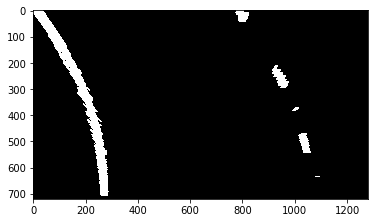

In [3]:
PATH = 'test2.jpg'
INPUT_SIZE = (1280, 720)

img = cv2.imread(PATH)
img = cv2.resize(img, INPUT_SIZE)

def show(img):
    plt.imshow(img, cmap='gray'); plt.show()

def binarise(img):
    ret, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
    show(thresh)
    return thresh

# gets x coordinates where there a lot of whites
def half_histogram(img):
    height = img.shape[0]
    # compute sum of pixels columnwise
    histogram = np.sum(img[height//2:,:], axis=0)
    return histogram    

# show(img)

# undistorted = undistort_img(img)
masked = get_combined_binary(img)
warped = get_warped(masked)
warped = binarise(warped)

# show(masked)

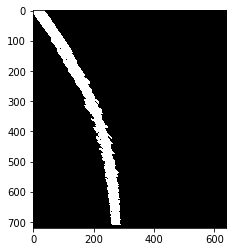

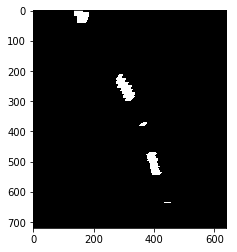

In [4]:
hist = half_histogram(warped)

mid_X = 640

left, right = warped[:,:mid_X], warped[:,mid_X:]

show(left)
show(right)

left_ys, left_xs = left.nonzero()
right_ys, right_xs = right.nonzero()

In [5]:
np.unique(left)

array([  0, 255], dtype=uint8)

In [6]:
np.unique(right)

array([  0, 255], dtype=uint8)

In [8]:
def get_thin(part_of_img):
    box = np.zeros((72,64))
    Xs, Ys = [], []

    for row in range(72):
        sums = []
        for col in range(64):
            sums.append(np.sum(part_of_img[row*10:(row+1)*10,col*10:(col+1)*10]))
        white_x = np.argmax(sums)
        if white_x:
            box[row, white_x] = 255
            Ys.append(row)
            Xs.append(white_x)

    return box, Xs, Ys[::-1]
        

[-0.0958605   0.39984707 65.01298077]


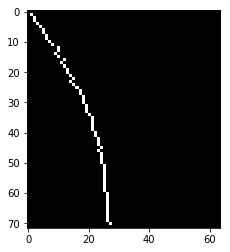

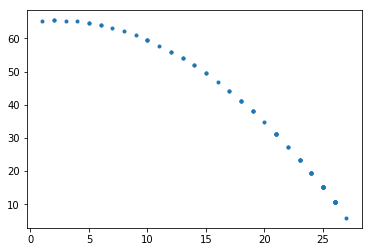

In [9]:
box1, x1, y1 = get_thin(left)

left_fit = np.polyfit(x1, y1, 2)
print(left_fit)

p = np.poly1d(left_fit)

show(box1)

plt.scatter(x1,p(x1), marker='.')
plt.show()


In [10]:
# print(list([[x,y] for x, y in zip(x1,y1)]))

[-0.07698292  2.46876305 35.4836821 ]


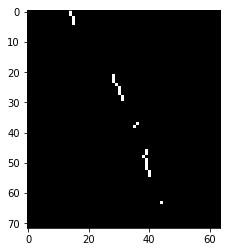

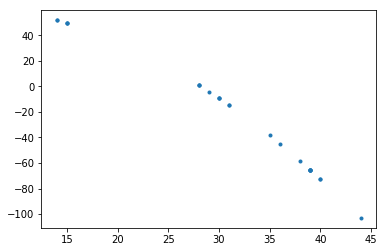

In [11]:
box2, x2, y2 = get_thin(right)

right_fit = np.polyfit(x2, y2, 2)

print(right_fit)

p2 = np.poly1d(right_fit)

show(box2)

plt.scatter(x2, p(x2), marker='.')
plt.show()


In [25]:
xl = list(range(min(x1),max(x2)))
yl = p(xl)

xr = list(range(min(x2),max(x2)))
yr = p2(xr)

In [30]:
pts1 = list([[x*10, y*10] for x, y in zip(xl,yl)])
pts2 = list([[x*10 + mid_X, y*10] for x, y in zip(xr,yr)])

pts = pts1[::-1] + pts2
            
poly = cv2.fillPoly(np.zeros((720, 1280)), [np.int_(pts)], 2)

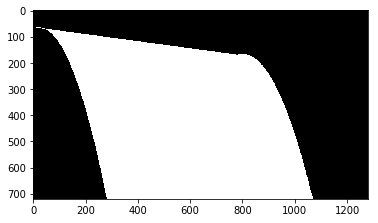

In [32]:
show(poly[::-1,:])

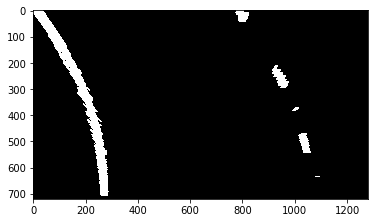

In [33]:
show(warped)